# Beyond Linearity

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split


In [60]:
# importing the Auto dataset
auto = pd.read_csv('data/Auto.csv')
auto.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [61]:
# Let's look at type of an element in the horsepower column
type(auto.horsepower.iloc[0])


str

In [62]:
# Convert the horsepower column to numeric
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')
auto['horsepower'].isna().sum()


5

In [63]:
auto.fillna({'horsepower' : auto['horsepower'].mean()}, inplace=True) 
auto['horsepower'].isna().sum()


0

In [64]:
# Let's add the quadratic term of the horsepower
auto['horsepower2'] = auto.horsepower**2
auto.head(3)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,horsepower2
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,16900.0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,27225.0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,22500.0


#### Train-Test split
- We split the dataset into 80% training and 20% test.
- This ensures that we evaluate the model on unseen data.

In [65]:
# Split the data into training and test sets
train, test = train_test_split(auto, test_size=0.2, random_state=1)


## Training And Testing

#### 1.1) Linear model training

In [66]:
# Parameters estimation with statsmodels of a quadratic term and the linear term
linear_model = smf.ols('mpg ~ horsepower', train).fit()
linear_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     432.1
Date:                Tue, 18 Feb 2025   Prob (F-statistic):           4.97e-61
Time:                        16:47:57   Log-Likelihood:                -965.89
No. Observations:                 317   AIC:                             1936.
Df Residuals:                     315   BIC:                             1943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.0202      0.843     47.501      0.000      38.363      41.678
horsepower    -0.1593      0.008    -20.787      0.000      -0.174      -0.144
==============================================================================
Omnibus:                       18.671   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.486
Skew:                           0.565   Prob(JB):                     3.56e-05
Kurtosis:                       3.523   Cond. No.                         323.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 1.2) Linear model testing 

In [67]:
# Evaluate the model on the test set
test['predicted_mpg_linear'] = linear_model.predict(test)

# Compute performance metrics
r2_linear = r2_score(test['mpg'], test['predicted_mpg_linear'])
mse_linear = mean_squared_error(test['mpg'], test['predicted_mpg_linear'])
mae_linear = mean_absolute_error(test['mpg'], test['predicted_mpg_linear'])

print("Linear Model Performance:")
print(f"R²: {r2_linear:.4f}")
print(f"MSE: {mse_linear:.4f}")
print(f"MAE: {mae_linear:.4f}")


Linear Model Performance:
R²: 0.6620
MSE: 20.0309
MAE: 3.4963


#### 2.1) Quadratic model training

In [68]:
# Parameters estimation with statsmodels of a quadratic term and the linear term
quadratic_model = smf.ols('mpg ~ horsepower + horsepower2', train).fit()
quadratic_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     304.9
Date:                Tue, 18 Feb 2025   Prob (F-statistic):           2.69e-74
Time:                        16:47:58   Log-Likelihood:                -931.76
No. Observations:                 317   AIC:                             1870.
Df Residuals:                     314   BIC:                             1881.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      57.3990      2.139     26.831      0.000      53.190      61.608
horsepower     -0.4767      0.037    -12.820      0.000      -0.550      -0.404
horsepower2     0.0013      0.000      8.687      0.000       0.001       0.002
==============================================================================
Omnibus:                       26.658   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.121
Skew:                           0.434   Prob(JB):                     3.95e-13
Kurtosis:                       4.889   Cond. No.                     1.27e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 2.2) Quadratic model testing

In [69]:
# Evaluate the quadratic model on the test set
test['predicted_mpg_quadratic'] = quadratic_model.predict(test)

# Compute performance metrics
r2_quadratic = r2_score(test['mpg'], test['predicted_mpg_quadratic'])
mse_quadratic = mean_squared_error(test['mpg'], test['predicted_mpg_quadratic'])
mae_quadratic = mean_absolute_error(test['mpg'], test['predicted_mpg_quadratic'])

print("Quadratic Model Performance:")
print(f"R²: {r2_quadratic:.4f}")
print(f"MSE: {mse_quadratic:.4f}")
print(f"MAE: {mae_quadratic:.4f}")


Quadratic Model Performance:
R²: 0.7102
MSE: 17.1745
MAE: 3.0076


#### Model comparison on Test

In [70]:
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Quadratic Regression'],
    'R2': [r2_linear, r2_quadratic],
    'MSE': [mse_linear, mse_quadratic],
    'MAE': [mae_linear, mae_quadratic]
})

comparison_df


,Model,R2,MSE,MAE
0,Linear Regression,0.662015,20.030929,3.496295
1,Quadratic Regression,0.710213,17.174462,3.007584


# 📊 Model Evaluation Metrics


When evaluating a regression model, we use different metrics to measure its performance. Below are the key metrics, their formulas, and what they tell us.

---

## 📌 1. Mean Squared Error (MSE)
The **Mean Squared Error (MSE)** measures the average squared difference between the actual and predicted values. It penalizes larger errors more than smaller ones.

### **Formula**:
$$ MSE = \frac{1}{n} \sum (y_{\text{true}} - y_{\text{pred}})^2 $$

### **Interpretation**:
- A lower **MSE** means the model is making better predictions.
- Since the differences are squared, larger errors are weighted more heavily.
- **It is sensitive to outliers**.

---

## 📌 2. Mean Absolute Error (MAE)
The **Mean Absolute Error (MAE)** is the average absolute difference between actual and predicted values. It gives an idea of the typical error size.

### **Formula**:
$$ MAE = \frac{1}{n} \sum |y_{\text{true}} - y_{\text{pred}}| $$

### **Interpretation**:
- A lower **MAE** means the model makes more accurate predictions.
- Unlike MSE, **MAE does not square the errors**, so it treats all errors equally.
- **Less sensitive to outliers** than MSE.

---

## 📌 3. Coefficient of Determination (R²)
The **R² (R-squared)** measures how well the model explains the variability of the target variable. It is also called the "goodness of fit" measure.

### **Formula**:
$$ R^2 = 1 - \frac{\sum (y_{\text{true}} - y_{\text{pred}})^2}{\sum (y_{\text{true}} - \bar{y})^2} $$

Where:
- \( y_{\text{true}} \) are the actual values,
- \( y_{\text{pred}} \) are the predicted values,
- \( \bar{y} \) is the mean of the actual values.

### **Interpretation**:
- **R² = 1** → The model perfectly explains the data.
- **R² = 0** → The model explains nothing; it's like guessing the average value.
- **R² < 0** → The model is worse than just using the mean.

---

## 📌 Key Differences
| Metric  | Measures | Sensitive to Outliers? | Range |
|---------|---------|-----------------------|-------|
| **MSE** | Average squared error | ✅ Yes (highly) | [0, ∞) |
| **MAE** | Average absolute error | ❌ No | [0, ∞) |
| **R²**  | Variance explained | ❌ No | (-∞, 1] |

- **Use MSE** when you want to penalize large errors more.
- **Use MAE** when you want a simple error measure with equal weight for all errors.
- **Use R²** to understand how well the model explains the variability of the data.

---

📌 **Conclusion**:
- **If MSE and MAE are low**, the model predicts well.
- **If R² is high (close to 1)**, the model explains most of the variability.
- **If R² is low (close to 0 or negative)**, the model is not good.

---


#### Graphically

In [71]:
# Hexadecimal colors
color_blue = "#1a559e"
color_pink = "#e71d71"
colore_black = "#0070c0"
color_gold = "#FFD700"

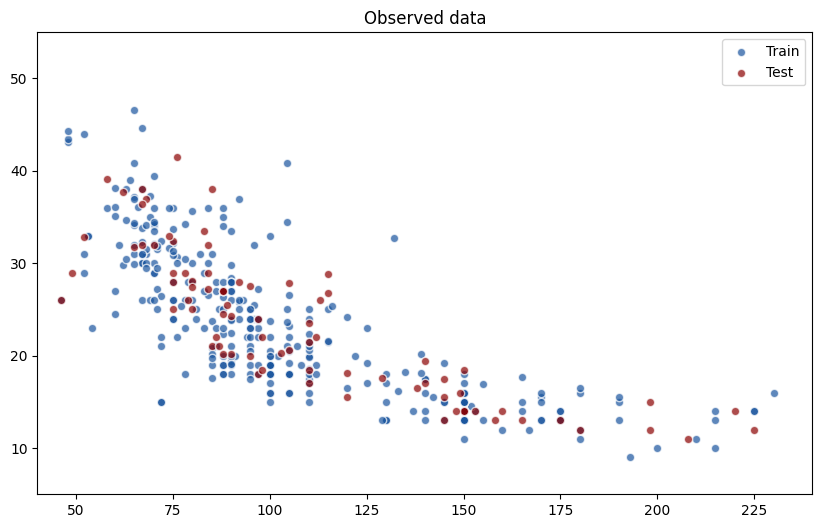

In [81]:
plt.figure(figsize=(10,6))
plt.scatter(train.horsepower, train.mpg, facecolors=color_blue, edgecolors='white', alpha=.7, label='Train')
plt.scatter(test.horsepower, test.mpg, facecolors='darkred', edgecolors='white', alpha=.7, label='Test')

plt.title('Observed data')
plt.legend()
plt.ylim(5,55)
plt.xlim(40,240)
plt.show()

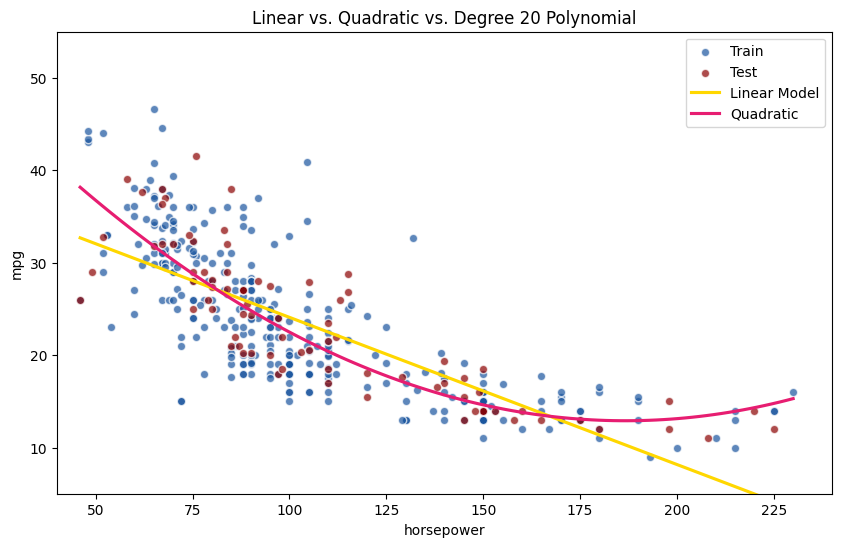

In [79]:
# With Seaborn's regplot() you can easily plot higher order polynomials.
plt.figure(figsize=(10,6))
plt.scatter(train.horsepower, train.mpg, facecolors=color_blue, edgecolors='white', alpha=.7, label='Train')
plt.scatter(test.horsepower, test.mpg, facecolors='darkred', edgecolors='white', alpha=.7, label='Test')
sns.regplot(x=train.horsepower, y=train.mpg, ci=None, label='Linear Model', scatter=False, color=color_gold)
sns.regplot(x=train.horsepower, y=train.mpg, ci=None, label='Quadratic', order=2, scatter=False, color=color_pink)
plt.title('Linear vs. Quadratic vs. Degree 20 Polynomial')
plt.legend()
plt.ylim(5,55)
plt.xlim(40,240)
plt.show()


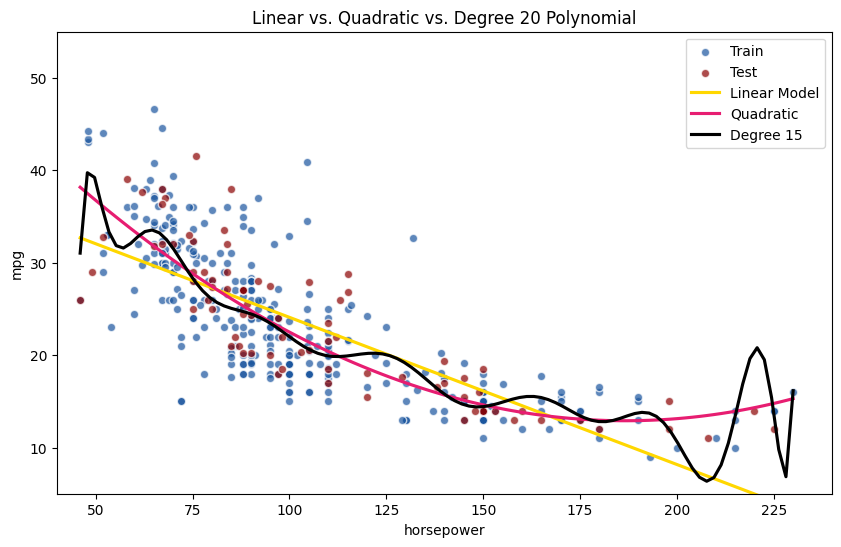

In [87]:
# With Seaborn's regplot() you can easily plot higher order polynomials.
plt.figure(figsize=(10,6))
plt.scatter(train.horsepower, train.mpg, facecolors=color_blue, edgecolors='white', alpha=.7, label='Train')
plt.scatter(test.horsepower, test.mpg, facecolors='darkred', edgecolors='white', alpha=.7, label='Test')
sns.regplot(x=train.horsepower, y=train.mpg, ci=None, label='Linear Model', scatter=False, color=color_gold)
sns.regplot(x=train.horsepower, y=train.mpg, ci=None, label='Quadratic', order=2, scatter=False, color=color_pink)
sns.regplot(x=train.horsepower, y=train.mpg, ci=None, label='Degree 15', order=15, scatter=False, color='black')
plt.title('Linear vs. Quadratic vs. Degree 20 Polynomial')
plt.legend()
plt.ylim(5,55)
plt.xlim(40,240)
plt.show()